  ##                                              Petr Vorobiev 154

### Create graph

In [1]:
from xlrd import open_workbook
from collections import Counter
import pandas as pd
from scipy.integrate import odeint
import random
import time
import datetime
import io
import array,re,itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
data = pd.read_excel('articles.xls',sep=';')[['date', 'Author']]
data = data.dropna()

In [3]:
str(data['date'][0])[2:4]

'16'

In [4]:
new_d = []
for i in range(len(data)):
    try:
        year = str(data['date'][i])[2:4]
        if year == '16':
            new_d.append(data['Author'][i])
    except KeyError:
        continue
data = new_d

In [5]:
res={}
for auth in data:
    try:
        authids=[l.split(':')[1] for l in auth.split(';')]
        for j in authids:
            c = Counter([k for k in authids if k != j])
            if j in res:
                res[j] += c
            else:
                res[j] = c
    except IndexError:
        continue

In [7]:
edges = []
for k, v in res.items():
    for j, w in v.items():
        edges.append((k, j, w))

In [8]:
G=nx.Graph()

In [9]:
G.add_weighted_edges_from(edges)

In [10]:
G = max(nx.connected_component_subgraphs(G), key=len)
T = nx.convert_node_labels_to_integers(G)

In [11]:
class SRW():
    nodeslist = []
    def __init__(self):
        self.growth_size = 2
        self.T = 100 #number of iterations
        #with a probability (1-fly_back_prob) select a neighbor node
        #with a probability fly_back_prob go back to the initial vertex
        self.fly_back_prob = 0.15
 
    def random_walk_sampling_simple(self, omplete_graph, nodes_to_sample):
        complete_graph = nx.convert_node_labels_to_integers(omplete_graph, 0, 'default', True)
        for n, data in complete_graph.nodes(data=True):
            complete_graph.node[n]['id'] = n
        nr_nodes = len(complete_graph.nodes())
        upper_bound_nr_nodes_to_sample = nodes_to_sample
        index_of_first_random_node = random.randint(0, nr_nodes-1)
        sampled_graph = nx.Graph()
 
        sampled_graph.add_node(complete_graph.node[index_of_first_random_node][True])
        iteration = 1
        edges_before_t_iter = 0
        curr_node = index_of_first_random_node
        while sampled_graph.number_of_nodes() != upper_bound_nr_nodes_to_sample:
            edges = [n for n in complete_graph.neighbors(curr_node)]
            index_of_edge = random.randint(0, len(edges) - 1)
            chosen_node = edges[index_of_edge]
            sampled_graph.add_node(complete_graph.node[chosen_node][True])
            sampled_graph.add_edge(complete_graph.node[curr_node][True], complete_graph.node[chosen_node][True])
            sampled_graph[complete_graph.node[curr_node][True]][complete_graph.node[chosen_node][True]]['weight'] = complete_graph[curr_node][chosen_node]['weight']
            curr_node = chosen_node
            iteration = iteration+1
 
            if iteration % self.T == 0:
                if ((sampled_graph.number_of_edges() - edges_before_t_iter) < self.growth_size):
                    curr_node = random.randint(0, nr_nodes-1)
                edges_before_t_iter = sampled_graph.number_of_edges()
        return sampled_graph

In [12]:
srw = SRW()

In [13]:
sampled_G = srw.random_walk_sampling_simple(T, 70)

In [14]:
G = sampled_G

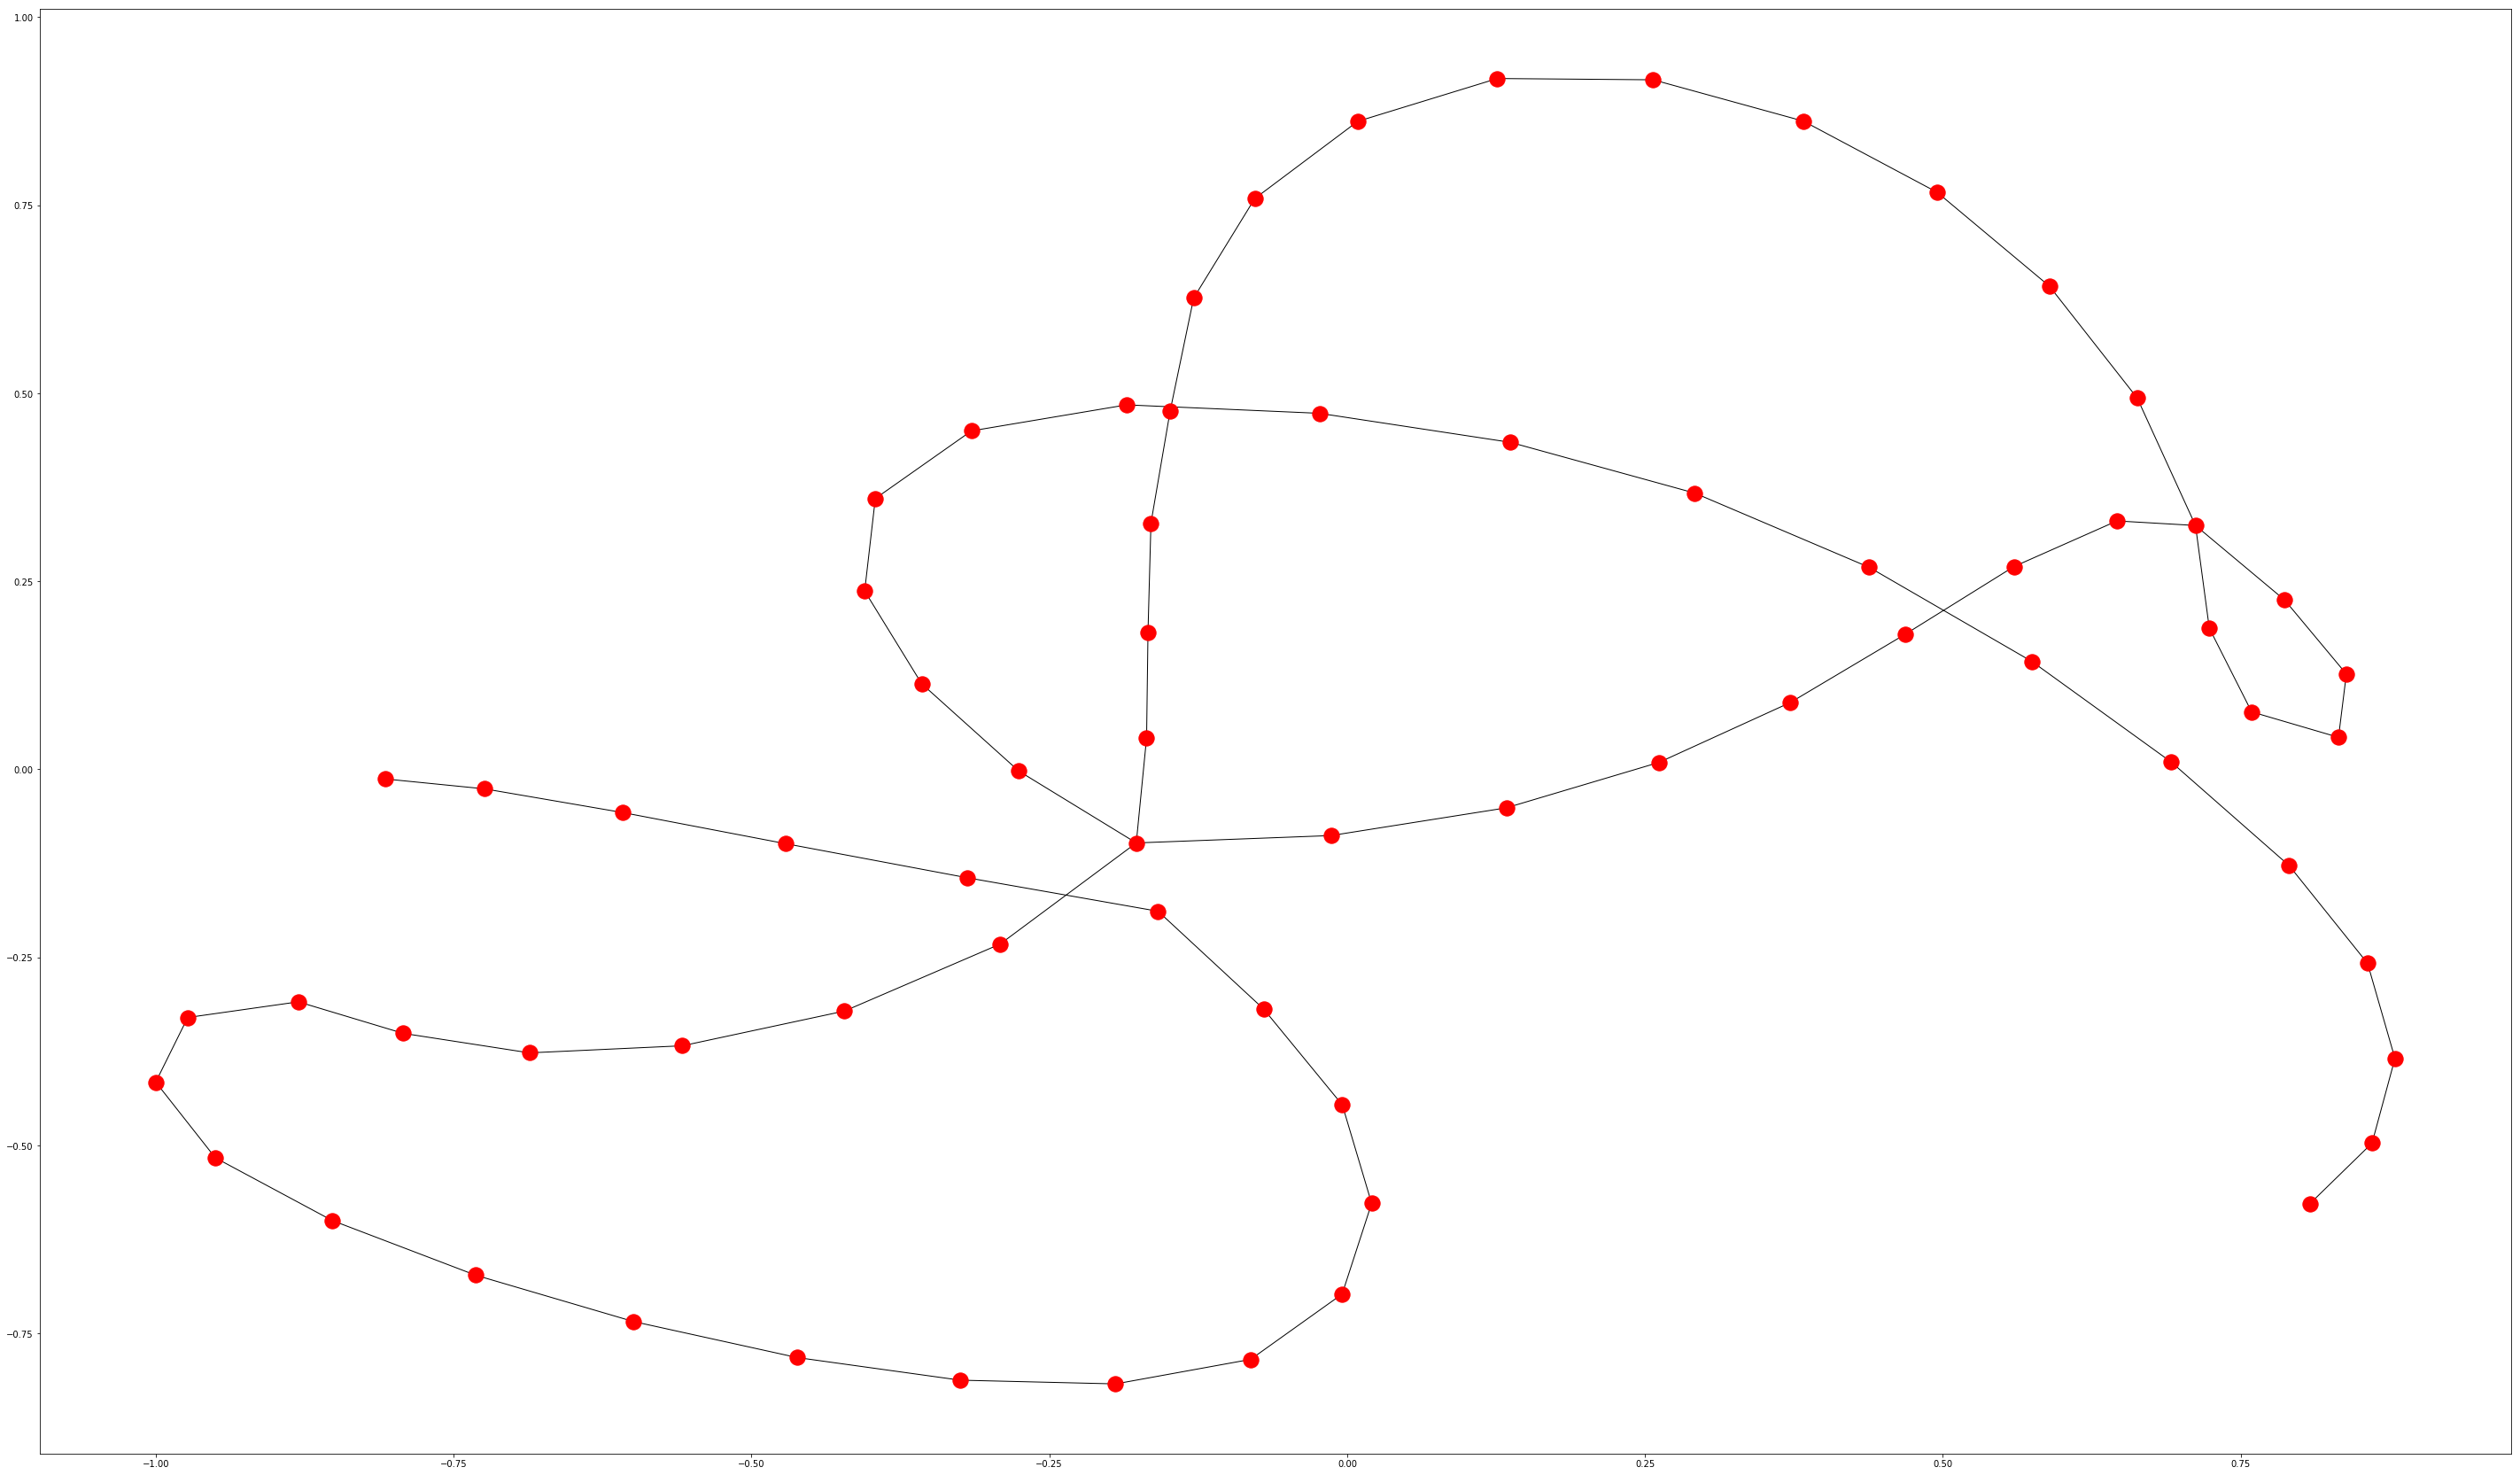

In [15]:
plt.figure(figsize=(50, 30))
layout = nx.spring_layout(G)
weights = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, pos=layout)
nx.draw_networkx_nodes(G, pos=layout)
plt.show()

In [18]:
G.nodes

NodeView((854, 773, 1673, 138, 2583, 2188, 653, 911, 912, 530, 2835, 1428, 174, 1046, 1303, 666, 1052, 2970, 2693, 3105, 2139, 2343, 2856, 2346, 1068, 301, 558, 3248, 3250, 2227, 1332, 2357, 1718, 3081, 2361, 347, 1467, 2108, 1930, 2111, 3521, 2498, 3395, 1095, 1292, 717, 1616, 3537, 3411, 2900, 1162, 3513, 2008, 2521, 2575, 2659, 869, 2278, 1895, 2280, 1130, 2798, 3568, 3186, 2186, 690, 504, 2041, 2938, 635))

In [19]:
"""
node_dict = {}
for v in G.nodes:
  """  

'\nnode_dict = {}\nfor v in G.nodes:\n  '

### 1 way: Vaccinate top 10% based on betweenness centrality

In [20]:
inf_prob = 0.3

In [21]:
n = len(G)
nodes = list(G.nodes)
n_idxs = {}
for i in range(len(nodes)):
    n_idxs[nodes[i]] = i
  

In [22]:
btw_centr = nx.betweenness_centrality(G, weight='weight')
btw_s = [(k, btw_centr[k]) for k in sorted(btw_centr, key=btw_centr.get, reverse=True)]

In [23]:
btw_idx = []
for i in range(len(btw_s)):
    btw_idx.append(btw_s[i][0])
btw_idx

[1930,
 3186,
 2659,
 174,
 1162,
 2361,
 530,
 2583,
 1895,
 2278,
 1046,
 2357,
 1467,
 2108,
 3521,
 1616,
 347,
 2498,
 2346,
 3105,
 2186,
 1673,
 911,
 3513,
 2575,
 773,
 1332,
 1068,
 3081,
 3411,
 2041,
 2188,
 2343,
 2008,
 1718,
 1292,
 653,
 2970,
 558,
 1303,
 2111,
 854,
 2856,
 2280,
 1052,
 690,
 3395,
 1095,
 869,
 666,
 3248,
 3537,
 1130,
 2227,
 504,
 635,
 2835,
 2900,
 2938,
 1428,
 3250,
 2521,
 2139,
 912,
 301,
 2693,
 717,
 3568,
 138,
 2798]

In [24]:
cur_inf = random.sample(G.nodes(), 7)
vac = []
i = 0
while len(vac) != 7:
    if btw_s[i][0] not in cur_inf:
        vac.append(btw_s[i][0])
    i += 1

In [25]:
vac_cost, day_cost = 500, 120


In [26]:
cur_cost = 7 * (vac_cost)

inf = dict()
for person in G.nodes():
    inf[person] = 0
for person in cur_inf:
    inf[person] = 1
for person in vac:
    inf[person] = 2

step = 0

while 1 in inf.values():
    step += 1
    illness = inf
    ill_list = []
    cured_list = []
    for person, ill in inf.items():
        if ill == 1:
            neighbors = list(G.neighbors(person))
            for neighbor in neighbors:
                
                if inf[neighbor] == 0:
                    weight = G[person][neighbor]['weight']
                    
                    if random.random() * weight <= inf_prob:
                        illness[neighbor] = 1
                        
            illness[person] = 2
            
            cur_cost += random.randint(3, 8) * day_cost
            
    inf = illness
    
print(cur_cost)
print('days before infection stops spreading:', step)

14900
days before infection stops spreading: 4


### Do the same for closeness centrality

In [28]:
cl_centr = nx.closeness_centrality(G)
cl_s = [(k, cl_centr[k]) for k in sorted(cl_centr, key=cl_centr.get, reverse=True)]

In [29]:
cur_inf = random.sample(G.nodes(), 7)
vac = []
i = 0
while len(vac) != 7:
    if cl_s[i][0] not in cur_inf:
        vac.append(cl_s[i][0])
    i += 1

In [30]:
cur_cost = 7 * (vac_cost)

inf = dict()
for person in G.nodes():
    inf[person] = 0
for person in cur_inf:
    inf[person] = 1
for person in vac:
    inf[person] = 2

step = 0

while 1 in inf.values():
    step += 1
    illness = inf
    ill_list = []
    cured_list = []
    for person, ill in inf.items():
        if ill == 1:
            neighbors = list(G.neighbors(person))
            for neighbor in neighbors:
                
                if inf[neighbor] == 0:
                    weight = G[person][neighbor]['weight']
                    
                    if random.random() * weight <= inf_prob:
                        illness[neighbor] = 1
                        
            illness[person] = 2
            
            cur_cost += random.randint(3, 8) * day_cost
            
    inf = illness
    
print(cur_cost)
print('days before infection stops spreading:', step)

7940
days before infection stops spreading: 2


### Finally, Katz centrality

In [36]:
k_centr = nx.katz_centrality(G)
k_s = [(k, k_centr[k]) for k in sorted(k_centr, key=k_centr.get, reverse=True)]

In [37]:
cur_inf = random.sample(G.nodes(), 7)
vac = []
i = 0
while len(vac) != 7:
    if k_s[i][0] not in cur_inf:
        vac.append(k_s[i][0])
    i += 1

In [44]:
cur_cost = 7 * (vac_cost)

inf = dict()
for person in G.nodes():
    inf[person] = 0
for person in cur_inf:
    inf[person] = 1
for person in vac:
    inf[person] = 2

step = 0

while 1 in inf.values():
    step += 1
    illness = inf
    ill_list = []
    cured_list = []
    for person, ill in inf.items():
        if ill == 1:
            neighbors = list(G.neighbors(person))
            for neighbor in neighbors:
                
                if inf[neighbor] == 0:
                    weight = G[person][neighbor]['weight']
                    
                    if random.random() * weight <= inf_prob:
                        illness[neighbor] = 1
                        
            illness[person] = 2
            
            cur_cost += random.randint(3, 8) * day_cost
            
    inf = illness
    
print(cur_cost)
print('days before infection stops spreading:', step)

10940
days before infection stops spreading: 2


### In my case, closeness centrality seemed to worked better than the other 2